In [31]:
from scipy.io import wavfile 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
audio = "./audio_chunks/chunk1.wav"
fs, Audiodata = wavfile.read(audio)
print(Audiodata)

[-60 -65 -67 ... 281 293 308]


In [33]:
print(fs)

48000


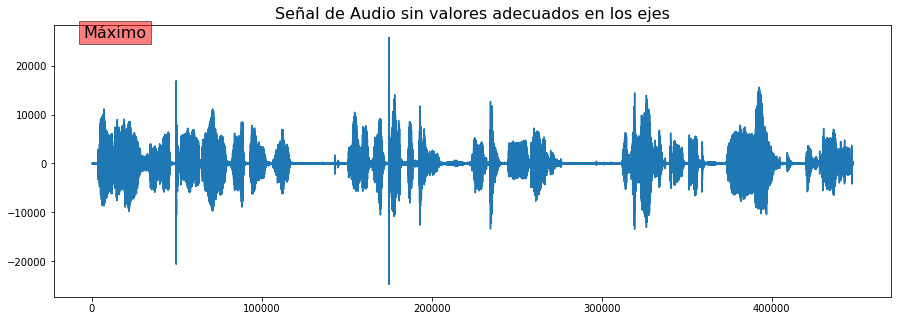

In [34]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
plt.plot(Audiodata) # Audiodata es un numpy array
plt.text(0-5000, np.max(Audiodata), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.title('Señal de Audio sin valores adecuados en los ejes',size=16);

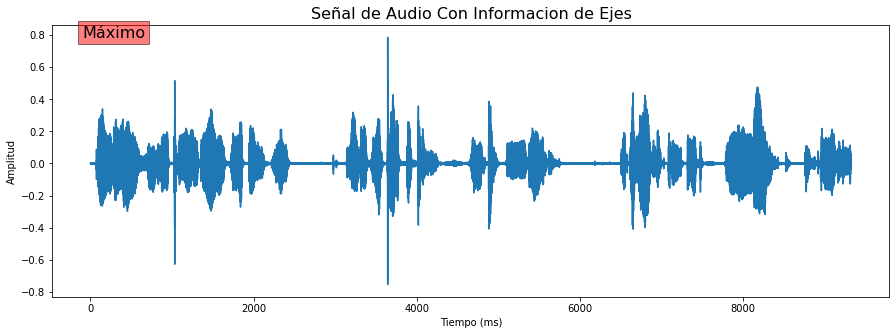

In [35]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
# Definir los valores de los datos de amplitud entre [-1 : 1] Audiodata.dtype es int16
AudiodataScaled = Audiodata/(2**15)

#definir los valores del eje x en milisegundos
timeValues = np.arange(0, len(AudiodataScaled), 1)/ fs # Convertir Muestras/Seg a Segundos
timeValues = timeValues * 1000  #Escala de tiempo en milisegundos

plt.plot(timeValues, AudiodataScaled);plt.title('Señal de Audio Con Informacion de Ejes',size=16)
plt.text(0-100, np.max(AudiodataScaled), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('Amplitud'); plt.xlabel('Tiempo (ms)');

In [36]:
AudiodataScaled

array([-0.00183105, -0.00198364, -0.00204468, ...,  0.00857544,
        0.00894165,  0.00939941])

In [37]:
str(type(AudiodataScaled))

"<class 'numpy.ndarray'>"

In [38]:
len(AudiodataScaled.tolist())


447744

In [39]:
len(timeValues.tolist())

447744

In [40]:
total = list(zip(timeValues.tolist(),AudiodataScaled.tolist()))

In [41]:
df = pd.DataFrame.from_records(total,columns=['time','scala'])

In [42]:
df

,time,scala
0,0.000000,-0.001831
1,0.020833,-0.001984
2,0.041667,-0.002045
3,0.062500,-0.001740
4,0.083333,-0.001404
...,...,...
447739,9327.895833,0.007690
447740,9327.916667,0.008301
447741,9327.937500,0.008575
447742,9327.958333,0.008942


In [43]:
df['scala'].describe()

count    447744.000000
mean         -0.000010
std           0.063680
min          -0.754028
25%          -0.012939
50%          -0.000122
75%           0.009979
max           0.786346
Name: scala, dtype: float64

In [44]:
df['mayor']= df['scala'].apply(lambda x: 1 if x > 0.05 else 0)

In [45]:
df

,time,scala,mayor
0,0.000000,-0.001831,0
1,0.020833,-0.001984,0
2,0.041667,-0.002045,0
3,0.062500,-0.001740,0
4,0.083333,-0.001404,0
...,...,...,...
447739,9327.895833,0.007690,0
447740,9327.916667,0.008301,0
447741,9327.937500,0.008575,0
447742,9327.958333,0.008942,0


Text(0.5, 0, 'Tiempo (ms)')

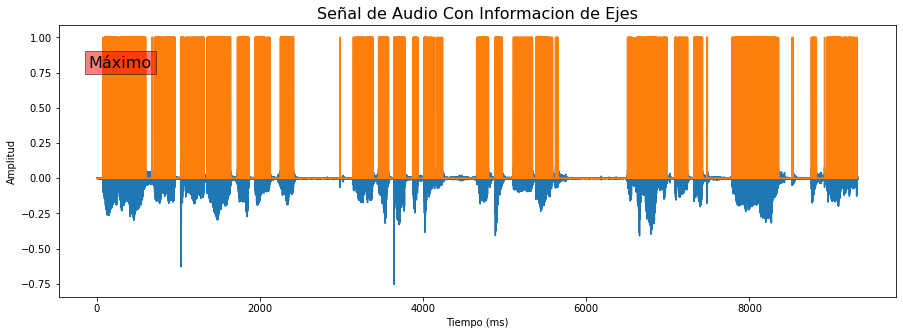

In [46]:
plt.plot(df['time'], df['scala']);plt.title('Señal de Audio Con Informacion de Ejes',size=16)
plt.plot(df['time'],df['mayor'])
plt.text(0-100, np.max(df['scala']), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('Amplitud'); plt.xlabel('Tiempo (ms)')

In [47]:
df

,time,scala,mayor
0,0.000000,-0.001831,0
1,0.020833,-0.001984,0
2,0.041667,-0.002045,0
3,0.062500,-0.001740,0
4,0.083333,-0.001404,0
...,...,...,...
447739,9327.895833,0.007690,0
447740,9327.916667,0.008301,0
447741,9327.937500,0.008575,0
447742,9327.958333,0.008942,0


In [48]:
df['time_round'] = df['time'].apply(lambda x: int(x))

In [49]:
df

,time,scala,mayor,time_round
0,0.000000,-0.001831,0,0
1,0.020833,-0.001984,0,0
2,0.041667,-0.002045,0,0
3,0.062500,-0.001740,0,0
4,0.083333,-0.001404,0,0
...,...,...,...,...
447739,9327.895833,0.007690,0,9327
447740,9327.916667,0.008301,0,9327
447741,9327.937500,0.008575,0,9327
447742,9327.958333,0.008942,0,9327


In [50]:
df['diference_mayor'] = df['mayor'].diff()
df['diference_time'] = df['time_round'].diff()

In [51]:
df

,time,scala,mayor,time_round,diference_mayor,diference_time
0,0.000000,-0.001831,0,0,NaN,NaN
1,0.020833,-0.001984,0,0,0.0,0.0
2,0.041667,-0.002045,0,0,0.0,0.0
3,0.062500,-0.001740,0,0,0.0,0.0
4,0.083333,-0.001404,0,0,0.0,0.0
...,...,...,...,...,...,...
447739,9327.895833,0.007690,0,9327,0.0,0.0
447740,9327.916667,0.008301,0,9327,0.0,0.0
447741,9327.937500,0.008575,0,9327,0.0,0.0
447742,9327.958333,0.008942,0,9327,0.0,0.0


In [52]:
df_copy = df[(df['diference_mayor'] > 0)]

In [53]:
df_copy['diference_time'] = df_copy['time_round'].diff()

/tmp/ipykernel_34054/1748380804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['diference_time'] = df_copy['time_round'].diff()


In [54]:
df_copy

,time,scala,mayor,time_round,diference_mayor,diference_time
3510,73.125000,0.060699,1,73,1.0,NaN
3523,73.395833,0.078705,1,73,1.0,0.0
3538,73.708333,0.054291,1,73,1.0,0.0
3554,74.041667,0.062073,1,74,1.0,1.0
4391,91.479167,0.052643,1,91,1.0,17.0
...,...,...,...,...,...,...
447053,9313.604167,0.063904,1,9313,1.0,22.0
447089,9314.354167,0.059387,1,9314,1.0,1.0
447111,9314.812500,0.052338,1,9314,1.0,0.0
447164,9315.916667,0.054016,1,9315,1.0,1.0


In [55]:
df_copy_2 = df_copy[(df_copy['diference_time'] > 50)]

In [56]:
df_copy_2

,time,scala,mayor,time_round,diference_mayor,diference_time
32395,674.895833,0.052490,1,674,1.0,78.0
49326,1027.625000,0.073364,1,1027,1.0,74.0
82709,1723.104167,0.052338,1,1723,1.0,86.0
93158,1940.791667,0.070007,1,1940,1.0,81.0
108015,2250.312500,0.056976,1,2250,1.0,128.0
142936,2977.833333,0.052887,1,2977,1.0,568.0
150907,3143.895833,0.050354,1,3143,1.0,166.0
165786,3453.875000,0.061310,1,3453,1.0,71.0
174834,3642.375000,0.151489,1,3642,1.0,68.0
186174,3878.625000,0.050720,1,3878,1.0,103.0


In [57]:
df_copy_2.count()

time               22
scala              22
mayor              22
time_round         22
diference_mayor    22
diference_time     22
dtype: int64

In [60]:
list_steps = df_copy_2['time_round']/1000

In [61]:
list_steps.tolist()

[0.674,
 1.027,
 1.723,
 1.94,
 2.25,
 2.977,
 3.143,
 3.453,
 3.642,
 3.878,
 4.013,
 4.661,
 4.88,
 5.105,
 6.505,
 7.086,
 7.319,
 7.477,
 7.786,
 8.523,
 8.758,
 8.92]